In [1]:
import numpy as np

emb_baseline_1 = np.load('../training/embeddings/baseline_flores_lm_eng.npy')
emb_baseline_2 = np.load('../training/embeddings/baseline_flores_lm_tel.npy')
emb_baseline_3 = np.load('../training/embeddings/baseline_flores_lm_swh.npy')
emb_baseline_4 = np.load('../training/embeddings/baseline_flores_lm_spa.npy')
emb_baseline_5 = np.load('../training/embeddings/baseline_flores_lm_deu.npy')


emb_lb_1 = np.load('../training/embeddings/lb_flores_lm_eng.npy')
emb_lb_2 = np.load('../training/embeddings/lb_flores_lm_tel.npy')
emb_lb_3 = np.load('../training/embeddings/lb_flores_lm_swh.npy')
emb_lb_4 = np.load('../training/embeddings/lb_flores_lm_spa.npy')
emb_lb_5 = np.load('../training/embeddings/lb_flores_lm_deu.npy')

In [2]:
emb_baseline = np.concatenate((emb_baseline_1, emb_baseline_2, emb_baseline_3, emb_baseline_4, emb_baseline_5), axis=0)
emb_lb = np.concatenate((emb_lb_1, emb_lb_2, emb_lb_3, emb_lb_4, emb_lb_5), axis=0)

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
emb_baseline = scaler.fit_transform(emb_baseline)
emb_lb = scaler.transform(emb_lb)

In [4]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
pca_baseline = pca.fit_transform(emb_baseline)
pca_lb = pca.transform(emb_lb)

In [5]:
import pandas as pd


labels = ['en'] * emb_baseline_1.shape[0] + \
    ['te'] * emb_baseline_2.shape[0] + \
    ['sw'] * emb_baseline_3.shape[0] + \
    ['es'] * emb_baseline_4.shape[0] + \
    ['de'] * emb_baseline_5.shape[0]



df_pca_baseline = pd.DataFrame(data=pca_baseline)
df_pca_baseline['labels'] = labels
df_pca_lb = pd.DataFrame(data=pca_lb)
df_pca_lb['labels'] = labels

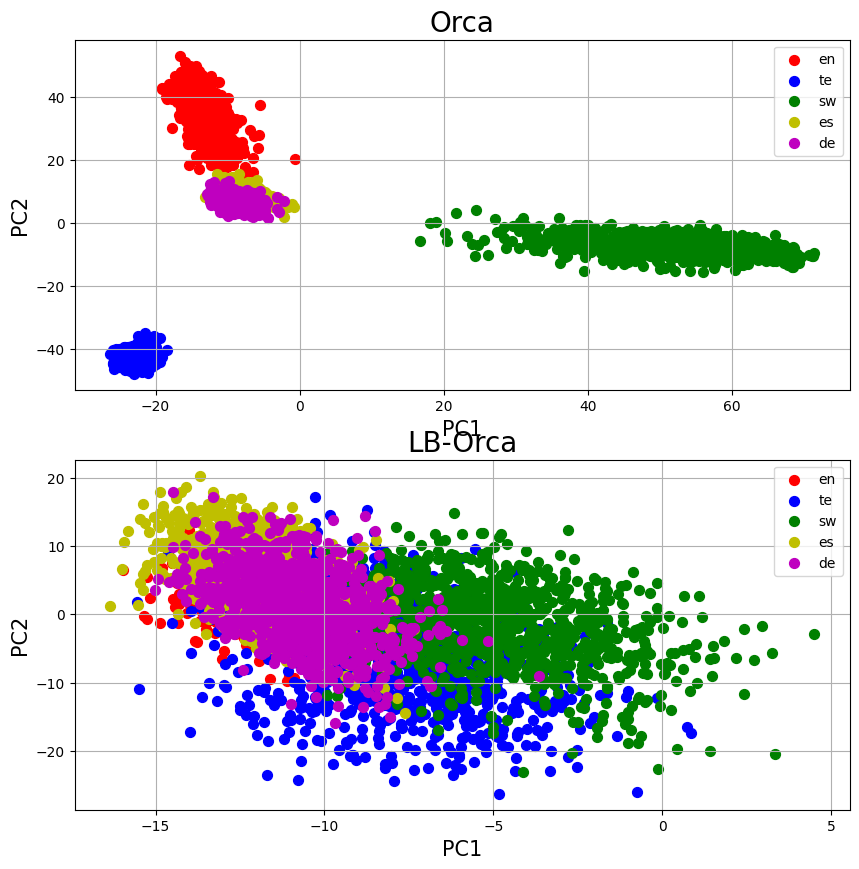

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1.set_xlabel('PC1', fontsize=15)
ax1.set_ylabel('PC2', fontsize=15)
ax2.set_xlabel('PC1', fontsize=15)
ax2.set_ylabel('PC2', fontsize=15)

ax1.set_title('Orca', fontsize=20)
ax2.set_title('LB-Orca', fontsize=20)

targets = ['en', 'te', 'sw', 'es', 'de']
colors = ['r', 'b', 'g', 'y', 'm']
for target, color in zip(targets, colors):
    indicesToKeep = df_pca_baseline['labels'] == target
    ax1.scatter(df_pca_baseline.loc[indicesToKeep, 0], df_pca_baseline.loc[indicesToKeep, 1], c=color, s=50)
ax1.legend(targets)
ax1.grid()

for target, color in zip(targets, colors):
    indicesToKeep = df_pca_lb['labels'] == target
    ax2.scatter(df_pca_lb.loc[indicesToKeep, 0], df_pca_lb.loc[indicesToKeep, 1], c=color, s=50)
ax2.legend(targets)
ax2.grid()

# ax2.set_ylim(ylim)

fig.savefig('../training/embeddings/plot1.png')
fig.show()